# Insurance Claims- Fraud Detection

Problem Statement:

Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [1]:
# Importing all Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('Insurance Claim Fraud Detection.csv')

In [3]:
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [4]:
data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
data=data.drop(['_c39'],axis=1)

In [7]:
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [8]:
data.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [9]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


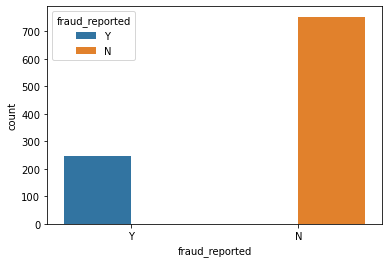

In [10]:
ax = sns.countplot(x='fraud_reported', data=data, hue='fraud_reported')

In [11]:
data['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

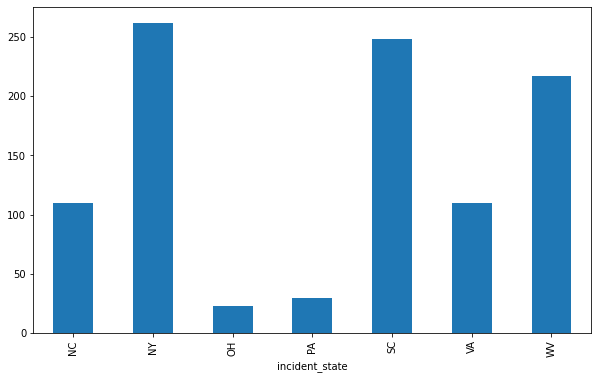

In [12]:
fig = plt.figure(figsize=(10,6))
ax = data.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)
plt.show()

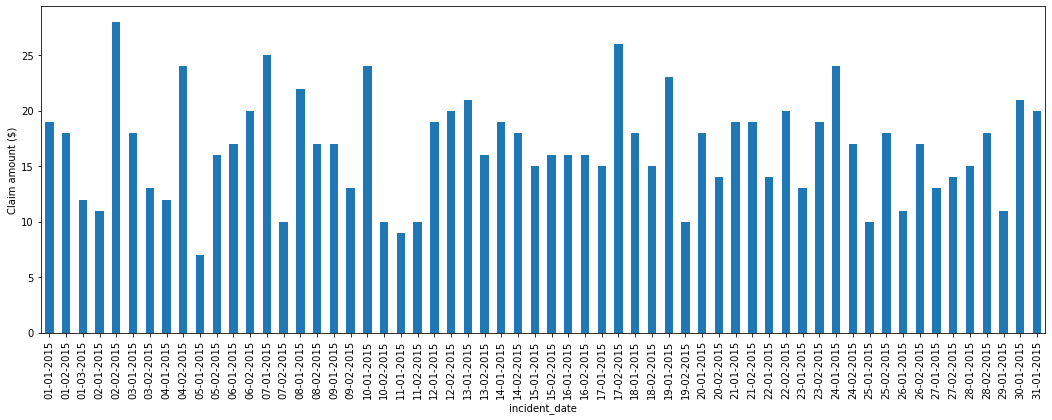

In [13]:
fig = plt.figure(figsize=(18,6))
ax = data.groupby('incident_date').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Claim amount ($)')
plt.show()

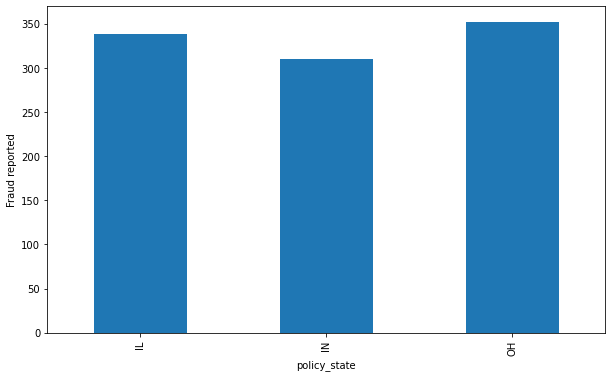

In [14]:
fig = plt.figure(figsize=(10,6))
ax = data.groupby('policy_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

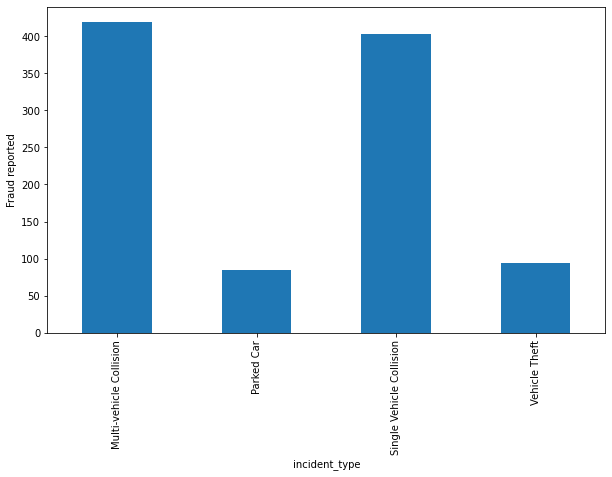

In [15]:
fig = plt.figure(figsize=(10,6))
ax = data.groupby('incident_type').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

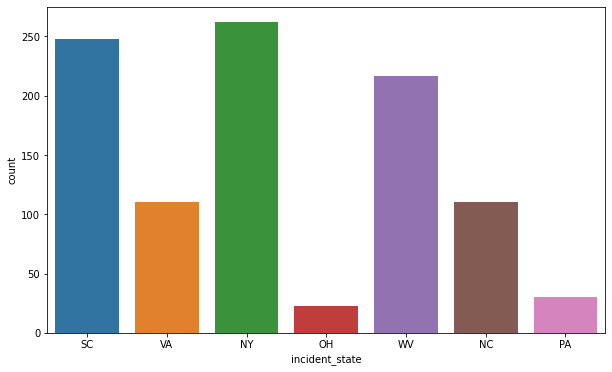

In [16]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='incident_state', data=data)

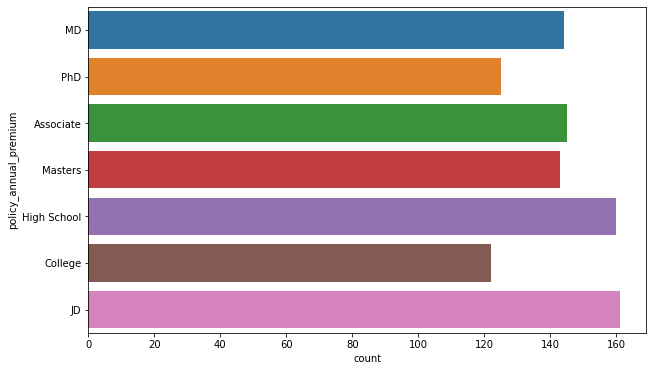

In [17]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(y = 'insured_education_level', data=data) 
ax.set_ylabel('policy_annual_premium')
plt.show()

# # Breakdown of Average Vehicle claim by insured's education level, grouped by fraud reported

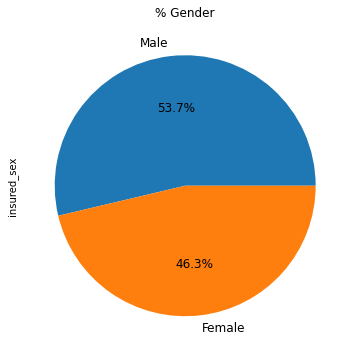

In [18]:
fig = plt.figure(figsize=(10,6))
ax = (data['insured_sex'].value_counts()*100.0 /len(data))\
.plot.pie(autopct='%.1f%%', labels = ['Male', 'Female'], fontsize=12)                                                                           
ax.set_title('% Gender')
plt.show()

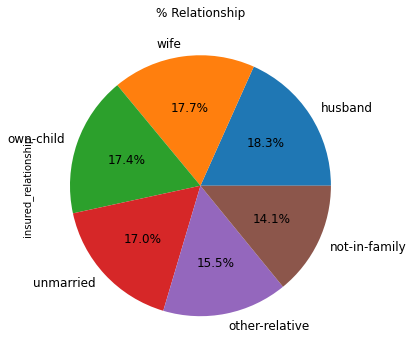

In [19]:
fig = plt.figure(figsize=(10,6))
ax = (data['insured_relationship'].value_counts()*100.0 /len(data))\
.plot.pie(autopct='%.1f%%', labels = ['husband', 'wife', 'own-child', 'unmarried', 'other-relative', 'not-in-family'],
         fontsize=12)                                                                           
ax.set_title('% Relationship')
plt.show()

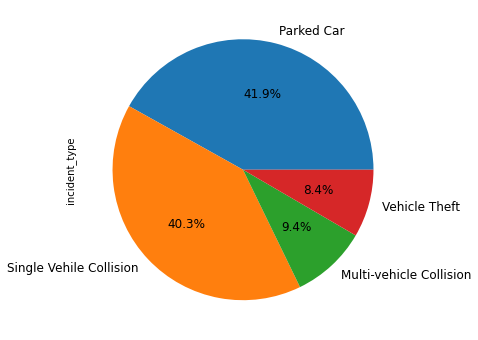

In [20]:
fig = plt.figure(figsize=(10,6))
ax = (data['incident_type'].value_counts()*100.0 /len(data))\
.plot.pie(autopct='%.1f%%', labels = ['Parked Car', 'Single Vehile Collision', 'Multi-vehicle Collision', 'Vehicle Theft'],
         fontsize=12) 

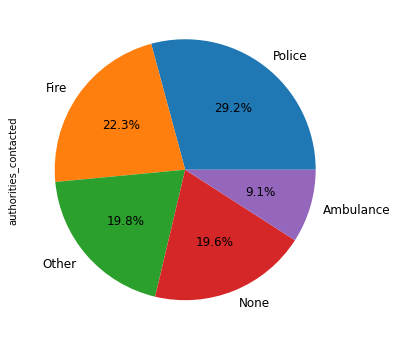

In [21]:
fig = plt.figure(figsize=(10,6))
ax = (data['authorities_contacted'].value_counts()*100.0 /len(data))\
.plot.pie(autopct='%.1f%%', labels = ['Police', 'Fire', 'Other', 'None', 'Ambulance'],
         fontsize=12)

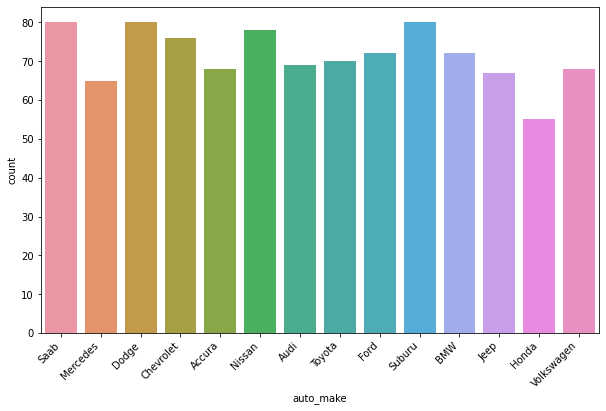

In [22]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='auto_make', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

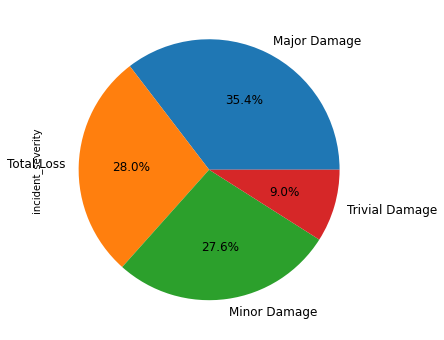

In [23]:
fig = plt.figure(figsize=(10,6))
ax = (data['incident_severity'].value_counts()*100.0 /len(data))\
.plot.pie(autopct='%.1f%%', labels = ['Major Damage', 'Total Loss', 'Minor Damage', 'Trivial Damage'],
         fontsize=12) 

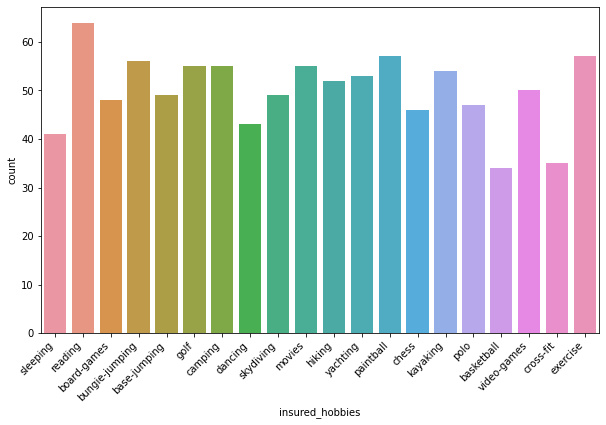

In [24]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='insured_hobbies', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

In [25]:
data["insured_occupation"].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

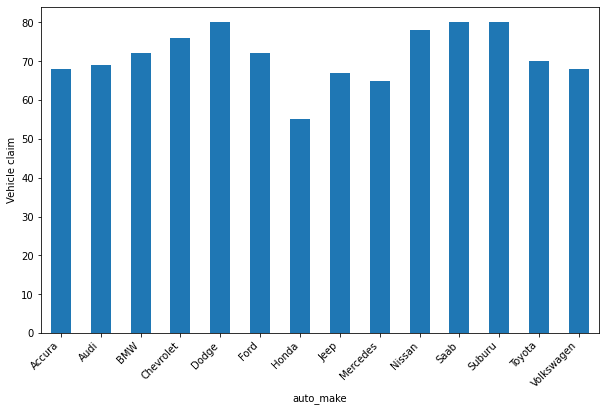

In [26]:
fig = plt.figure(figsize=(10,6))
ax= data.groupby('auto_make').vehicle_claim.count().plot.bar(ylim=0)
ax.set_ylabel('Vehicle claim')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

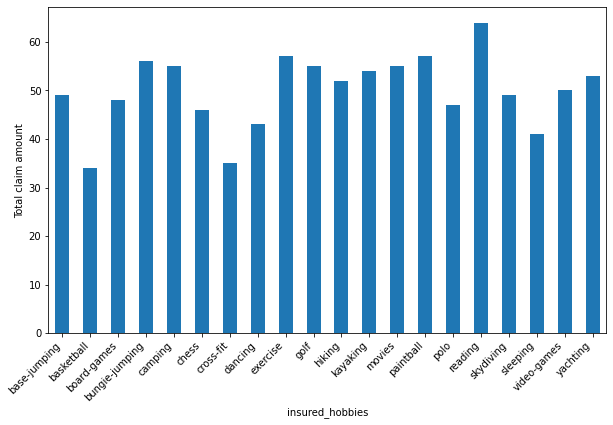

In [27]:
fig = plt.figure(figsize=(10,6))
ax= data.groupby('insured_hobbies').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Total claim amount')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

# Data Processing

In [28]:
data['fraud_reported'].replace(to_replace='Y', value=1, inplace=True)
data['fraud_reported'].replace(to_replace='N',  value=0, inplace=True)

data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,1
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,1
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,0
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,0
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,0
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,0


In [29]:
data[['insured_zip']] = data[['insured_zip']].astype(object)

In [30]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,0.247000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,0.431483
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,0.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,0.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,0.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,0.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,1.000000


Some variables such as 'policy_bind_date', 'incident_date', 'incident_location' and 'insured_zip' contain very high number of level. We will remove these columns for our purposes.

<AxesSubplot:>

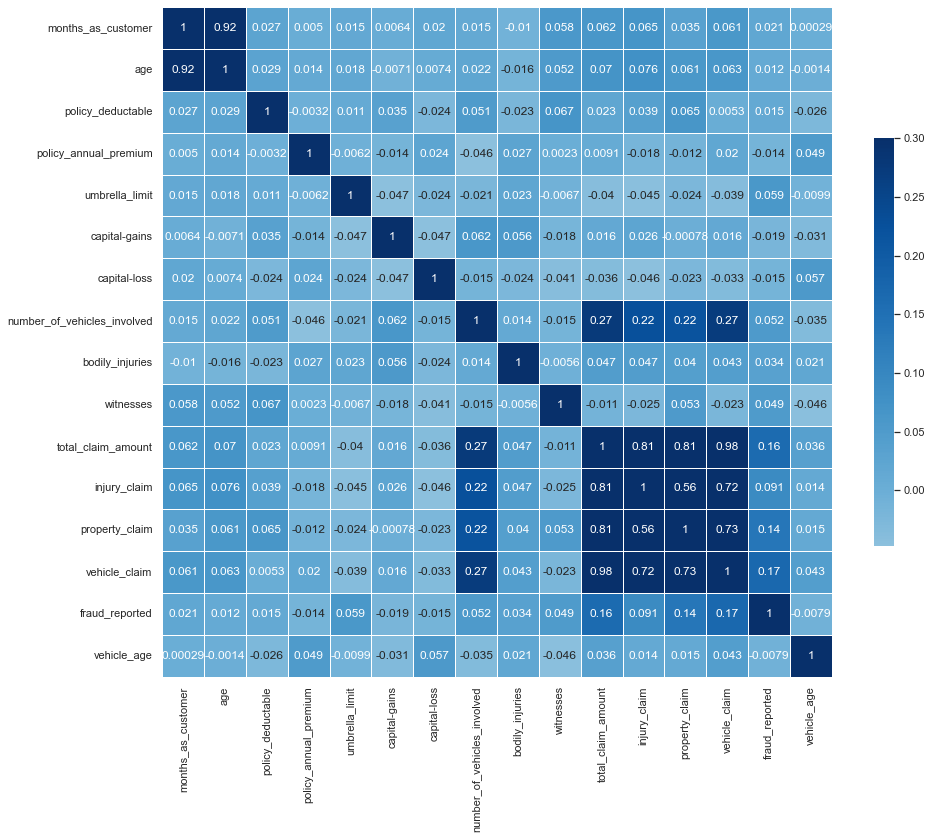

In [205]:
#data = pd.get_dummies(data)
#print('Training Features shape: ', data.shape)
sns.set(style="dark")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(data.corr(), cmap="Blues", vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [31]:
data.auto_year.value_counts()  # check the spread of years to decide on further action.

1995    56
1999    55
2005    54
2006    53
2011    53
2007    52
2003    51
2009    50
2010    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64

auto_year has 21 levels, and the number of records for each of the levels are quite significant considering datasize is not so large. We will do some feature engineering using this variable considering, the year of manufacturing of automobile indicates the age of the vehicle and may contain valuable information for insurance premium or fraud is concerned.

In [32]:
data['vehicle_age'] = 2022 - data['auto_year'] # Deriving the age of the vehicle based on the year value 
data['vehicle_age'].head(10)

0    18
1    15
2    15
3     8
4    13
5    19
6    10
7     7
8    10
9    26
Name: vehicle_age, dtype: int64

In [33]:
bins = [-1, 3, 6, 9, 12, 17, 20, 24]  # Factorize according to the time period of the day.
names = ["past_midnight", "early_morning", "morning", 'fore-noon', 'afternoon', 'evening', 'night']
data['incident_period_of_day'] = pd.cut(data.incident_hour_of_the_day, bins, labels=names).astype(object)
data[['incident_hour_of_the_day', 'incident_period_of_day']].head(20)

,incident_hour_of_the_day,incident_period_of_day
0,5,early_morning
1,8,morning
2,7,morning
3,5,early_morning
4,20,evening
5,19,evening
6,0,past_midnight
7,23,night
8,21,night
9,14,afternoon


In [34]:
# Check on categorical variables:
data.select_dtypes(include=['object']).columns  # checking categorcial columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_zip',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'incident_date',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'property_damage', 'police_report_available',
       'auto_make', 'auto_model', 'incident_period_of_day'],
      dtype='object')

In [35]:
# dropping unimportant columns

data = data.drop(columns = ['policy_number', 'insured_zip', 'policy_bind_date', 'incident_date', 'incident_location', 'auto_year', 'incident_hour_of_the_day'])

In [36]:
data.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vehicle_age,incident_period_of_day
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,YES,71610,6510,13020,52080,Saab,92x,1,18,early_morning
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,?,5070,780,780,3510,Mercedes,E400,1,15,morning
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,NO,34650,7700,3850,23100,Dodge,RAM,0,15,morning
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,1,8,early_morning
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,NO,6500,1300,650,4550,Accura,RSX,0,13,evening


In [37]:
# identify variables with '?' values
unknowns = {}
for i in list(data.columns):
    if (data[i]).dtype == object:
        j = np.sum(data[i] == "?")
        unknowns[i] = j
unknowns = pd.DataFrame.from_dict(unknowns, orient = 'index')
print(unknowns)

                           0
policy_state               0
policy_csl                 0
insured_sex                0
insured_education_level    0
insured_occupation         0
insured_hobbies            0
insured_relationship       0
incident_type              0
collision_type           178
incident_severity          0
authorities_contacted      0
incident_state             0
incident_city              0
property_damage          360
police_report_available  343
auto_make                  0
auto_model                 0
incident_period_of_day     0


Collision_type, property_damage, police_report_available contain many missing values. So, first isolate these variables, inspect these individually for spread of category values.

In [38]:
data.collision_type.value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

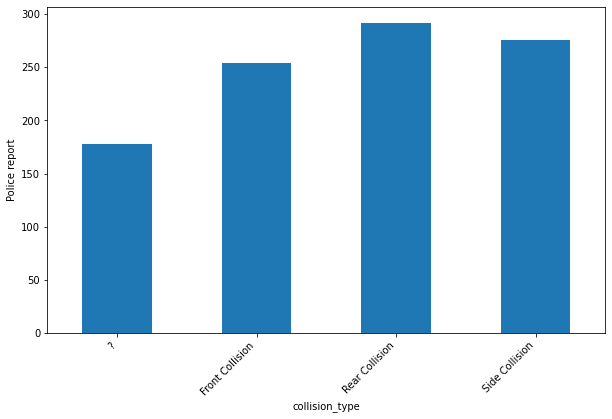

In [39]:
fig = plt.figure(figsize=(10,6))
ax= data.groupby('collision_type').police_report_available.count().plot.bar(ylim=0)
ax.set_ylabel('Police report')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

In [40]:
data.property_damage.value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

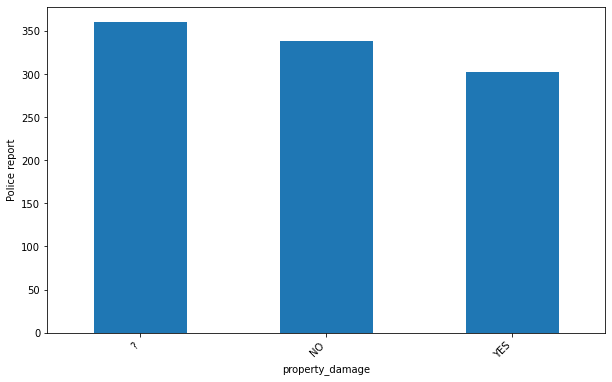

In [41]:
fig = plt.figure(figsize=(10,6))
ax= data.groupby('property_damage').police_report_available.count().plot.bar(ylim=0)
ax.set_ylabel('Police report')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

In [42]:
data.police_report_available.value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [43]:
data.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'fraud_reported', 'vehicle_age',
       'incident_period_of_day'],
      dtype='object')

In [45]:
data._get_numeric_data().columns # Checking numeric columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'number_of_vehicles_involved', 'bodily_injuries',
       'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim', 'fraud_reported', 'vehicle_age'],
      dtype='object')

In [46]:
data.select_dtypes(include=['object']).columns  # checking categorcial columns

Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'incident_period_of_day'],
      dtype='object')

Applying one-hot encoding to convert all categorical variables except out target variables

In [47]:
dummies = pd.get_dummies(data[[
    'policy_state', 
    'policy_csl', 
    'insured_sex', 
    'insured_education_level',
    'insured_occupation', 
    'insured_hobbies', 
    'insured_relationship',
    'incident_type', 
    'incident_severity',
    'authorities_contacted', 
    'incident_state', 
    'incident_city',
    'auto_make', 
    'auto_model',
    'incident_period_of_day']])

dummies = dummies.join(data[[
    'collision_type', 
    'property_damage', 
    'police_report_available', 
    "fraud_reported"]])

dummies.head()

,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,...,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight,collision_type,property_damage,police_report_available,fraud_reported
0,0,0,1,0,1,0,0,1,0,0,...,1,0,0,0,0,0,Side Collision,YES,YES,1
1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,?,?,?,1
2,0,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,0,Rear Collision,NO,NO,0
3,1,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,Front Collision,?,NO,1
4,1,0,0,0,0,1,0,1,1,0,...,0,1,0,0,0,0,?,NO,NO,0


In [48]:
X = dummies.iloc[:, 0:-1]
y = dummies.iloc[:, -1]

In [49]:
len(X.columns)

145

In [51]:
dummies.collision_type

0       Side Collision
1                    ?
2       Rear Collision
3      Front Collision
4                    ?
            ...       
995    Front Collision
996     Rear Collision
997     Side Collision
998     Rear Collision
999                  ?
Name: collision_type, Length: 1000, dtype: object

## Label encoding

In [52]:
from sklearn.preprocessing import LabelEncoder
X['collision_en'] = LabelEncoder().fit_transform(dummies['collision_type'])
X[['collision_type', 'collision_en']]

,collision_type,collision_en
0,Side Collision,3
1,?,0
2,Rear Collision,2
3,Front Collision,1
4,?,0
...,...,...
995,Front Collision,1
996,Rear Collision,2
997,Side Collision,3
998,Rear Collision,2


In [53]:
X['property_damage'].replace(to_replace='YES', value=1, inplace=True)
X['property_damage'].replace(to_replace='NO', value=0, inplace=True)
X['property_damage'].replace(to_replace='?', value=0, inplace=True)
X['police_report_available'].replace(to_replace='YES', value=1, inplace=True)
X['police_report_available'].replace(to_replace='NO', value=0, inplace=True)
X['police_report_available'].replace(to_replace='?', value=0, inplace=True)

In [54]:
X

,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,...,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight,collision_type,property_damage,police_report_available,collision_en
0,0,0,1,0,1,0,0,1,0,0,...,1,0,0,0,0,0,Side Collision,1,1,3
1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,?,0,0,0
2,0,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,0,Rear Collision,0,0,2
3,1,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,Front Collision,0,0,1
4,1,0,0,0,0,1,0,1,1,0,...,0,1,0,0,0,0,?,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,1,0,0,1,1,0,0,0,...,0,1,0,0,0,0,Front Collision,1,0,1
996,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,Rear Collision,1,0,2
997,0,0,1,0,1,0,1,0,0,0,...,1,0,0,0,0,0,Side Collision,0,1,3
998,1,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,1,Rear Collision,0,1,2


In [55]:
X = X.drop(columns = ['collision_type'])

In [57]:
X = pd.concat([X, data._get_numeric_data()], axis=1)  # joining numeric columns

In [58]:
X = X.drop(columns = ['fraud_reported'])

In [59]:
X

,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,...,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,vehicle_age
0,0,0,1,0,1,0,0,1,0,0,...,53300,0,1,1,2,71610,6510,13020,52080,18
1,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,5070,780,780,3510,15
2,0,0,1,1,0,0,1,0,0,0,...,35100,0,3,2,3,34650,7700,3850,23100,15
3,1,0,0,0,1,0,1,0,0,0,...,48900,-62400,1,1,2,63400,6340,6340,50720,8
4,1,0,0,0,0,1,0,1,1,0,...,66000,-46000,1,0,1,6500,1300,650,4550,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,1,0,0,1,1,0,0,0,...,0,0,1,0,1,87200,17440,8720,61040,16
996,1,0,0,1,0,0,1,0,0,0,...,70900,0,1,2,3,108480,18080,18080,72320,7
997,0,0,1,0,1,0,1,0,0,0,...,35100,0,3,2,3,67500,7500,7500,52500,26
998,1,0,0,0,0,1,0,1,1,0,...,0,0,1,0,1,46980,5220,5220,36540,24


We now have a dataset that we could use to evaluate an algorithm sensitive to missing values

# Model Prediction

In [61]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# evaluate an LDA model on the dataset using k-fold cross validation
model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=5, random_state=7 , shuffle=True)
result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
print(result.mean())

0.836


83.6% accuracy without standardizing the data. This looks good to go for Random Forest Classification method. Random Forest is a tree-based model and hence does not require feature scaling. The convergence and numerical precision issues, which can sometimes trip up the algorithms used in logistic and linear regression, as well as neural networks, aren't so important in case of random forest.

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1234)
print('length of X_train and X_test: ', len(X_train), len(X_test))
print('length of y_train and y_test: ', len(y_train), len(y_test))

length of X_train and X_test:  800 200
length of y_train and y_test:  800 200


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

In [188]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=1234)
print(x_train.shape)
print(x_test.shape)

(750, 160)
(250, 160)


# Logistic Regression

In [189]:
logiestic = LogisticRegression(max_iter=200)
logiestic.fit(x_train, y_train)
y_train_pred = logiestic.predict(x_train)
y_pred= logiestic.predict(x_test)
print("Train accuracy: "+str(accuracy_score(y_train, y_train_pred)))
print("Test accuracy: "+str(accuracy_score(y_test, y_pred)))

Train accuracy: 0.7693333333333333
Test accuracy: 0.72


Text(0.5, 1.0, 'Train confusion matrix')

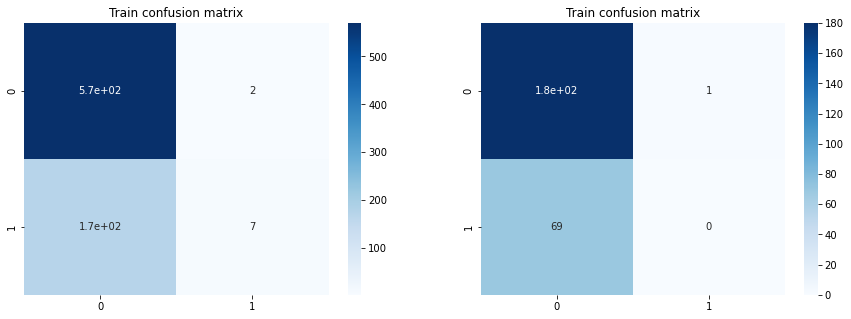

In [190]:
fig, axes = plt.subplots(figsize=(15, 5), ncols=2)
sns.heatmap(confusion_matrix(y_train, y_train_pred), cmap="Blues", annot=True, ax=axes[0])
axes[0].set_title("Train confusion matrix")
sns.heatmap(confusion_matrix(y_test, y_pred), cmap="Blues", annot=True, ax=axes[1])
axes[1].set_title("Train confusion matrix")

AUC : 0.5544078789334614


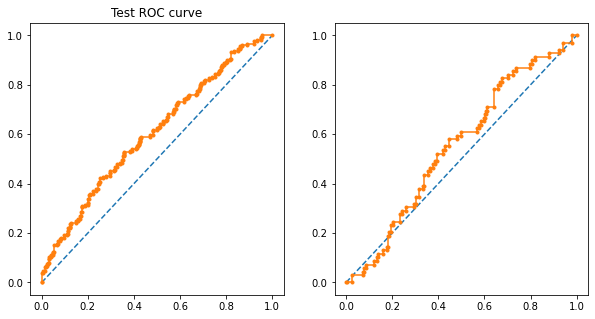

In [191]:
y_prob_train = logiestic.predict_proba(x_train)[:,1]
y_prob_test = logiestic.predict_proba(x_test)[:,1]

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_prob_train)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_prob_test)
fig, axes = plt.subplots(figsize=(10,5), ncols=2, nrows=1)
axes[0].plot([0,1],[0,1], linestyle='--')
axes[0].plot(fpr_train, tpr_train, marker='.')
axes[0].set_title("Train ROC curve")

axes[1].plot([0,1],[0,1], linestyle='--')
axes[1].plot(fpr_test, tpr_test, marker='.')
axes[0].set_title("Test ROC curve")

print("AUC : " + str(auc(fpr_test, tpr_test)))

# KNN

In [192]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_train_pred = knn.predict(x_train)
y_pred= knn.predict(x_test)
print("Train accuracy: "+str(accuracy_score(y_train, y_train_pred)))
print("Test accuracy: "+str(accuracy_score(y_test, y_pred)))

Train accuracy: 0.7986666666666666
Test accuracy: 0.696


Text(0.5, 1.0, 'Train confusion matrix')

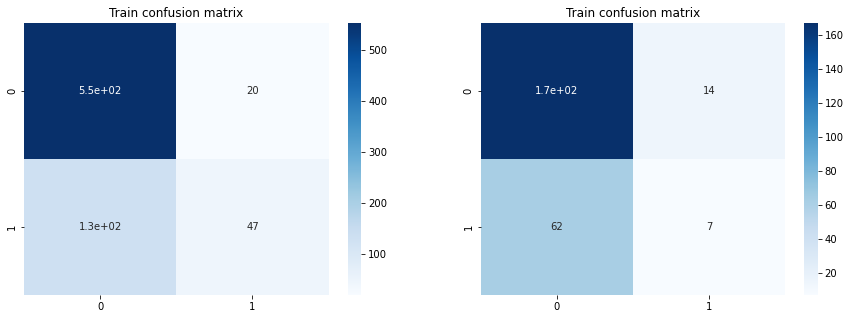

In [193]:
fig, axes = plt.subplots(figsize=(15, 5), ncols=2)
sns.heatmap(confusion_matrix(y_train, y_train_pred), cmap="Blues", annot=True, ax=axes[0])
axes[0].set_title("Train confusion matrix")
sns.heatmap(confusion_matrix(y_test, y_pred), cmap="Blues", annot=True, ax=axes[1])
axes[1].set_title("Train confusion matrix")

AUC : 0.5795099687725198


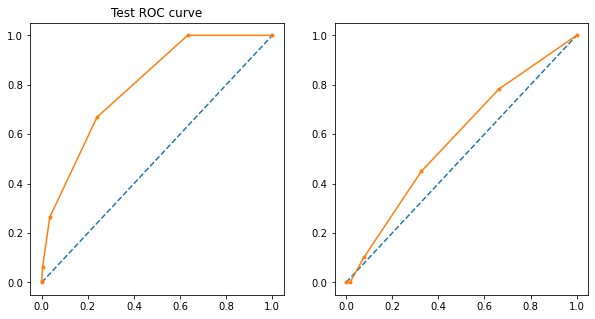

In [194]:
y_prob_train = knn.predict_proba(x_train)[:,1]
y_prob_test = knn.predict_proba(x_test)[:,1]

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_prob_train)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_prob_test)
fig, axes = plt.subplots(figsize=(10,5), ncols=2, nrows=1)
axes[0].plot([0,1],[0,1], linestyle='--')
axes[0].plot(fpr_train, tpr_train, marker='.')
axes[0].set_title("Train ROC curve")

axes[1].plot([0,1],[0,1], linestyle='--')
axes[1].plot(fpr_test, tpr_test, marker='.')
axes[0].set_title("Test ROC curve")

print("AUC : " + str(auc(fpr_test, tpr_test)))

# Random Forest

In [195]:
forest = RandomForestClassifier(n_estimators=100, max_depth=8)
forest.fit(x_train, y_train)
y_train_pred = forest.predict(x_train)
y_pred= forest.predict(x_test)
print("Train accuracy: "+str(accuracy_score(y_train, y_train_pred)))
print("Test accuracy: "+str(accuracy_score(y_test, y_pred)))

Train accuracy: 0.9546666666666667
Test accuracy: 0.736


Text(0.5, 1.0, 'Train confusion matrix')

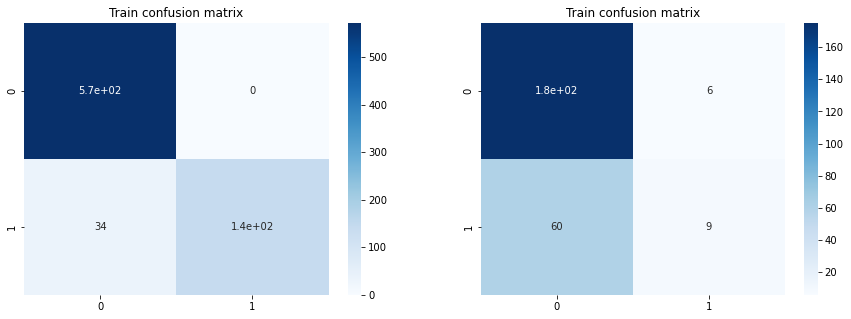

In [196]:
fig, axes = plt.subplots(figsize=(15, 5), ncols=2)
sns.heatmap(confusion_matrix(y_train, y_train_pred), cmap="Blues", annot=True, ax=axes[0])
axes[0].set_title("Train confusion matrix")
sns.heatmap(confusion_matrix(y_test, y_pred), cmap="Blues", annot=True, ax=axes[1])
axes[1].set_title("Train confusion matrix")

AUC : 0.8771719112819281


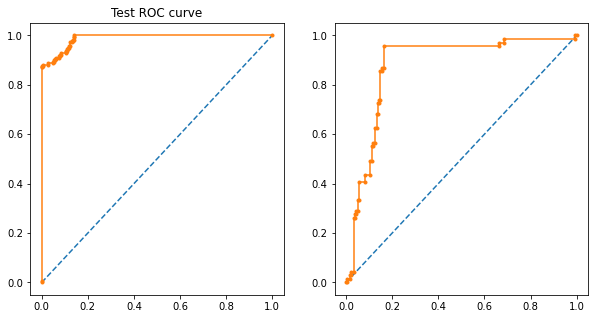

In [197]:
y_prob_train = forest.predict_proba(x_train)[:,1]
y_prob_test = forest.predict_proba(x_test)[:,1]

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_prob_train)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_prob_test)
fig, axes = plt.subplots(figsize=(10,5), ncols=2, nrows=1)
axes[0].plot([0,1],[0,1], linestyle='--')
axes[0].plot(fpr_train, tpr_train, marker='.')
axes[0].set_title("Train ROC curve")

axes[1].plot([0,1],[0,1], linestyle='--')
axes[1].plot(fpr_test, tpr_test, marker='.')
axes[0].set_title("Test ROC curve")

print("AUC : " + str(auc(fpr_test, tpr_test)))

# Gradient Boosting

In [198]:
GD = GradientBoostingClassifier(n_estimators=50, learning_rate=0.5)
GD.fit(x_train, y_train)
y_train_pred = GD.predict(x_train)
y_pred= GD.predict(x_test)
print("Train accuracy: "+str(accuracy_score(y_train, y_train_pred)))
print("Test accuracy: "+str(accuracy_score(y_test, y_pred)))

Train accuracy: 1.0
Test accuracy: 0.816


Text(0.5, 1.0, 'Train confusion matrix')

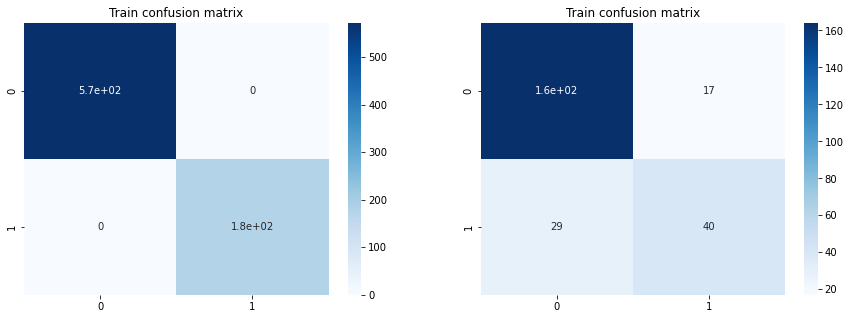

In [199]:
fig, axes = plt.subplots(figsize=(15, 5), ncols=2)
sns.heatmap(confusion_matrix(y_train, y_train_pred), cmap="Blues", annot=True, ax=axes[0])
axes[0].set_title("Train confusion matrix")
sns.heatmap(confusion_matrix(y_test, y_pred), cmap="Blues", annot=True, ax=axes[1])
axes[1].set_title("Train confusion matrix")

AUC : 0.8779726159019938


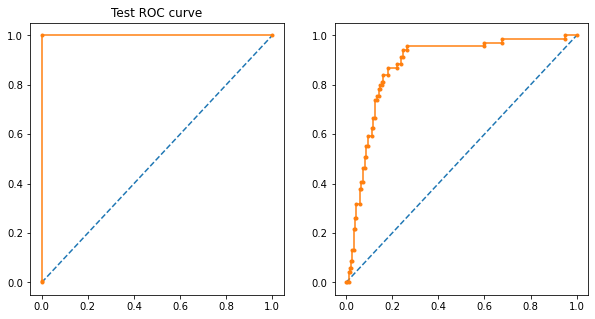

In [200]:
y_prob_train = GD.predict_proba(x_train)[:,1]
y_prob_test = GD.predict_proba(x_test)[:,1]

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_prob_train)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_prob_test)
fig, axes = plt.subplots(figsize=(10,5), ncols=2, nrows=1)
axes[0].plot([0,1],[0,1], linestyle='--')
axes[0].plot(fpr_train, tpr_train, marker='.')
axes[0].set_title("Train ROC curve")

axes[1].plot([0,1],[0,1], linestyle='--')
axes[1].plot(fpr_test, tpr_test, marker='.')
axes[0].set_title("Test ROC curve")

print("AUC : " + str(auc(fpr_test, tpr_test)))

### Conclusion :

Depending on the accuracy and graphs on each model we can assume that Gradient boosting model is the best model that fit this data